In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug_data, clinical_trial_data, how='left', on="Mouse ID", copy=False)


# Display the data table for preview
combined_data.tail()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


## Tumor Response to Treatment

#### Set up Tumor Volume Mean

In [2]:
# Group Data by Drup and Timepoint
grouped_combined_data = combined_data.groupby(by=["Drug", "Timepoint"])

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = grouped_combined_data.mean().drop(columns="Metastatic Sites").reset_index()

# Convert to Pivotted Dataframe and drop unnecessary columns
df_mean_tumor_vol = mean_tumor_vol.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_mean_tumor_vol
    

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


#### Set up Standard Error for Tumor Volume 

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = grouped_combined_data.sem().drop(columns="Metastatic Sites").reset_index()

# Convert to Pivotted DataFrame and drop unnecessary columns
df_sem_tumor_vol = sem_tumor_vol.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_sem_tumor_vol


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


#### Plot Mean Tumor Volume 

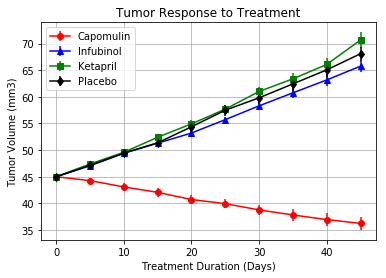

In [16]:
# Generate the Plot (with Error Bars)
x= df_mean_tumor_vol.index
y_C= df_mean_tumor_vol["Capomulin"]
error_C= df_sem_tumor_vol["Capomulin"]

y_I = df_mean_tumor_vol["Infubinol"]
error_I = df_sem_tumor_vol["Infubinol"]

y_K = df_mean_tumor_vol["Ketapril"]
error_K = df_sem_tumor_vol["Ketapril"]

y_P= df_mean_tumor_vol["Placebo"]
error_P= df_sem_tumor_vol["Placebo"]

plt.errorbar(x, y_C, yerr=error_C, fmt='-ro')
plt.errorbar(x, y_I, yerr=error_I, fmt='-b^')
plt.errorbar(x, y_K, yerr=error_K, fmt='-gs')
plt.errorbar(x, y_P, yerr=error_P, fmt='-kd')

plt.legend()
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Tumor_Response")


## Metastatic Response to Treatment

#### Set up Metastatic Sites Mean

In [5]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_tumor_meta = grouped_combined_data.mean().drop(columns="Tumor Volume (mm3)").reset_index()

# Convert to Pivotted DataFrame and drop unnecesary columns
df_mean_tumor_meta = mean_tumor_meta.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_mean_tumor_meta


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


#### Set up Metastatic Sites Standard Error 

In [6]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_tumor_meta = grouped_combined_data.sem().drop(columns="Tumor Volume (mm3)").reset_index()

# Convert to Pivotted DataFrame and drop unnecessary columns 
df_sem_tumor_meta = sem_tumor_meta.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_sem_tumor_vol


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


#### Plot Metastatic Sites 

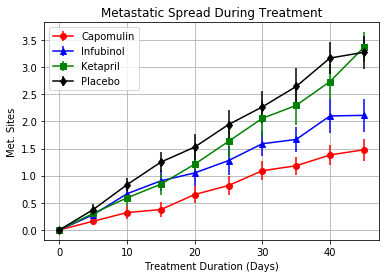

In [7]:
# Generate the Plot (with Error Bars)
x= df_mean_tumor_meta.index
y_C= df_mean_tumor_meta["Capomulin"]
error_C= df_sem_tumor_meta["Capomulin"]

y_I = df_mean_tumor_meta["Infubinol"]
error_I = df_sem_tumor_meta["Infubinol"]

y_K = df_mean_tumor_meta["Ketapril"]
error_K = df_sem_tumor_meta["Ketapril"]

y_P= df_mean_tumor_meta["Placebo"]
error_P= df_sem_tumor_meta["Placebo"]

plt.errorbar(x, y_C, yerr=error_C, fmt='-ro')
plt.errorbar(x, y_I, yerr=error_I, fmt='-b^')
plt.errorbar(x, y_K, yerr=error_K, fmt='-gs')
plt.errorbar(x, y_P, yerr=error_P, fmt='-kd')

plt.legend()
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("Tumor_Meta")


## Survival Rates

#### Set up Mouse Counts 

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint 
mean_mice = grouped_combined_data["Mouse ID"].count()

# Convert to Pivotted DataFrame and drop unnecessary columns
df_mean_mice = mean_mice.reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse ID').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Convert to Percentages
df_mean_mice = (100. * df_mean_mice / 25)

# Preview DataFrame
df_mean_mice.tail()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0
45,84.0,36.0,44.0,44.0


#### Plot Mouse Counts 

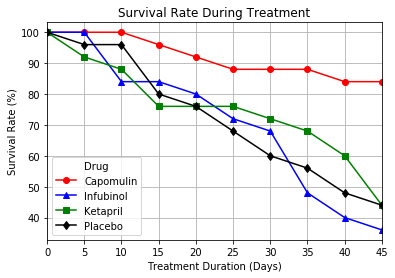

In [17]:
# Generate plot
df_mean_mice.plot(style = ["-ro", "-b^", "-gs", "-kd"]) 

plt.grid()
plt.title("Survival Rate During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")

plt.savefig("Survival_Rate")

## Summary Bar Graph

In [10]:
# Calculate the percent changes for each drug
tumor_pct_change =  pd.DataFrame(100 * (df_mean_tumor_vol.iloc[-1] - df_mean_tumor_vol.iloc[0]) / df_mean_tumor_vol.iloc[0], 
                                columns=['Tumor Change'])

# Add Boolean column for positive or negative values
tumor_pct_change["positive"] = tumor_pct_change > 0

# Display the data to confirm
tumor_pct_change

,Tumor Change,positive
Drug,,
Capomulin,-19.475303,False
Infubinol,46.123472,True
Ketapril,57.028795,True
Placebo,51.297960,True


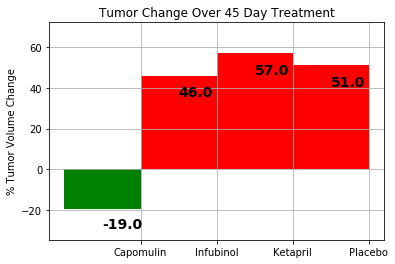

In [13]:
# Generate Plot
x = tumor_pct_change.index
y= tumor_pct_change["Tumor Change"]

bars = plt.bar(x, y, width=1, color=tumor_pct_change["positive"].map({True: 'r', False: 'g'}))
        
        
plt.title('Tumor Change Over 45 Day Treatment') 
plt.margins(y=.2)
plt.grid() 
plt.yticks([-20, 0, 20, 40, 60])
plt.ylabel("% Tumor Volume Change")
plt.xticks([.5,1.5,2.5,3.5], labels=["Capomulin","Infubinol", "Ketapril", "Placebo"])
for bar in bars:
    yval = bar.get_height().round(decimals=0)
    plt.text(bar.get_x() + 0.5, yval - 10, yval, fontweight='bold', fontsize=14 )


# Save the Figure
plt.savefig("Tumor_Change")